In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
l_eq= 1.0
g = 10.0
dt = 0.01
Nt = int(10/dt)

z=np.array([[5.0,6.0]])
v=np.array([[0.0, 0.0]])
z_s=np.copy(z)
v_s=np.copy(v)
ls=[]

def update_a(z):
    if z[0,1]>z[0,0]:
        l=l_eq-(z[0,1]-z[0,0])
        ls.append(l)
    elif z[0,0]>z[0,1]:
        l=l_eq+(z[0,1]-z[0,0])
        ls.append(l)
    return np.array([[-g+l,-g-l]])


a=update_a(z)
a_s = np.copy(a)


In [3]:
for i in range(Nt):

    # update z
    z = z+ v*dt+a/2*dt;
    if z[0,0]<0:
        z[0,0]= -z[0,0]
    if z[0,1]<0:
        z[0,1]= -z[0,1]
    z_s = np.append(z_s, z, axis=0)

    # update a
    a_new = update_a(z)
    a_s = np.append(a_s, a_new, axis=0)

    # update v
    v = v + (a_new+a)*dt/2
    v_s = np.append(v_s, v, axis=0)

    # save a
    a = a_new

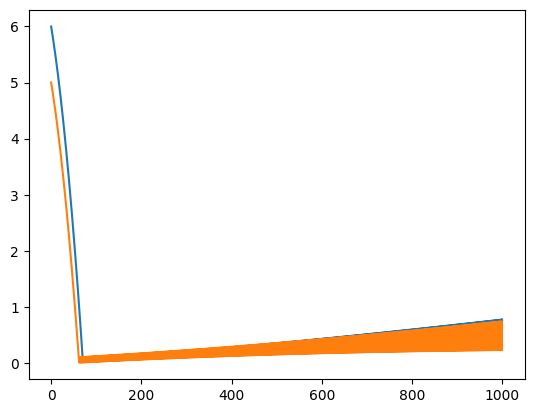

In [6]:
plt.plot(z_s[:,1])
plt.plot(z_s[:,0]);